In [66]:
import seaborn as sns

In [67]:
import numpy as np
import pandas as pd
from fastai.conv_learner import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
PATH='../../dog-breed/'
sz=224
arch=resnet34

In [8]:
label_csv=f'{PATH}labels.csv'
n=len(list(open(label_csv)))-1
#val_indxs=get_cv_idxs(n)

In [43]:
data=ImageClassifierData.from_csv(PATH,'train',f'{PATH}labels.csv',test_name='test',
                                 suffix='.jpg',tfms=tfms_from_model(arch,sz,max_zoom=1.1))

In [44]:
learn=ConvLearner.pretrained(arch,data,precompute=True)

 92%|█████████▏| 118/128 [00:05<00:00, 21.62it/s, loss=13.9]


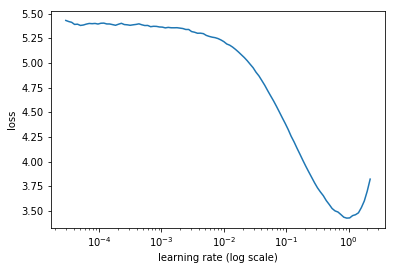

In [45]:
learn.lr_find()
learn.sched.plot()

In [60]:
learn.fit(0.1,3,cycle_len=1,cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                    
    0      0.285792   0.564951   0.835127  
    1      0.289193   0.588876   0.827299                    
    2      0.236426   0.564041   0.835127                    
    3      0.2744     0.598583   0.832192                    
    4      0.22668    0.600966   0.834638                    
    5      0.187442   0.581889   0.834638                    
    6      0.165457   0.614049   0.835127                    



[array([0.61405]), 0.8351272015655578]

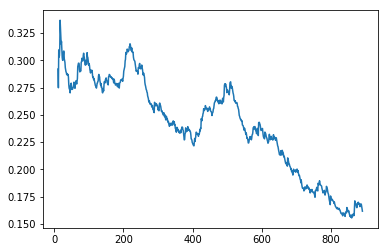

In [61]:
learn.sched.plot_loss()

In [31]:
log_preds,y=learn.TTA(is_test=True)

In [55]:
probs=np.exp(np.mean(log_preds,axis=0))

In [56]:
ds=pd.DataFrame(probs)
ds.columns=data.classes

In [57]:
ds.insert(0,'id',[o[5:-4] for o in data.test_ds.fnames] )

In [58]:
ds.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,266490a2b053a4a3bf68e779f28fb5a9,9.623321e-10,4.454189e-11,1.128886e-10,9.323840e-11,7.607753e-10,7.358713e-09,1.662641e-12,2.437640e-13,1.157981e-07,...,4.605898e-12,3.004167e-11,4.528890e-06,1.788807e-07,6.056205e-06,8.339027e-12,1.920157e-11,5.051476e-11,8.335898e-11,1.829565e-11
1,dae9fd18836d8df20989ef0101771d4b,4.443007e-07,2.270464e-06,2.304047e-08,4.648114e-10,1.576935e-10,7.159077e-09,8.532651e-07,1.807170e-08,4.643925e-09,...,2.285393e-11,4.204992e-10,3.104037e-08,6.347492e-09,3.410496e-08,2.590058e-09,1.289080e-09,6.429270e-07,4.044900e-08,2.185870e-09
2,079a40f22b0fad9a66f76797b62bb930,3.275652e-09,3.959002e-11,1.494263e-10,3.901195e-10,1.715451e-09,3.451830e-12,2.423480e-11,3.773803e-11,1.284990e-08,...,7.885457e-10,1.531582e-13,5.194611e-10,8.293981e-11,9.246007e-11,3.969294e-10,5.321072e-11,9.844647e-12,1.433925e-10,3.025438e-11
3,ab8462f9a501d362041d47582fddc9ad,1.101853e-09,1.256074e-08,7.654295e-11,2.318322e-10,1.003414e-12,3.469443e-07,6.043762e-11,1.540683e-12,5.104263e-10,...,9.674073e-11,1.004210e-09,2.892638e-10,2.772525e-11,6.320343e-10,1.272832e-07,2.476560e-10,5.182648e-13,1.297839e-10,2.517592e-09
4,8895089b432e020cc42e6262b5a1c2dd,9.191696e-10,8.382998e-11,2.405234e-08,3.518204e-10,3.859282e-07,5.183022e-06,1.581376e-08,1.234682e-04,1.658376e-07,...,6.856420e-09,5.137190e-09,1.282546e-09,1.137850e-07,3.203324e-10,5.903880e-08,8.131119e-09,3.869481e-08,3.309571e-09,2.125717e-10


In [59]:
ds.to_csv('sub2.gz',compression='gzip',index=False)

In [54]:
np.mean(log_preds,axis=0).shape

(10357, 120)

In [83]:
def takeSecond(ele):
    return ele[1]
dic={'a':20,'b':14,'c':2,}
lis=list(zip(dic.keys(),dic.values()))
sorted(lis,key=takeSecond)

[('c', 2), ('b', 14), ('a', 20)]